In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
figdir = "/mnt/BigDisk/YMazeResults/behavior/"
os.makedirs(figdir,exist_ok=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.11001807657812257
0.10904625799328695
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.1100692616471082
0.16736622393861975
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.06032445223871624
0.11761779819386359
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
0.5986160337525217
0.1284017130366221
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.04977265940030089
0.06784264128951935
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
0.09556160932095294
0.11449060078059704
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}
0.30208560688972996
0.5298903020411834
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': -1, 'ravel_ind': 0}
0.2815490926532458
0.28627437193222127
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel_arm': 1, 'ravel_ind': 1}
0.09538482551033799
0.13479597571404267
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 

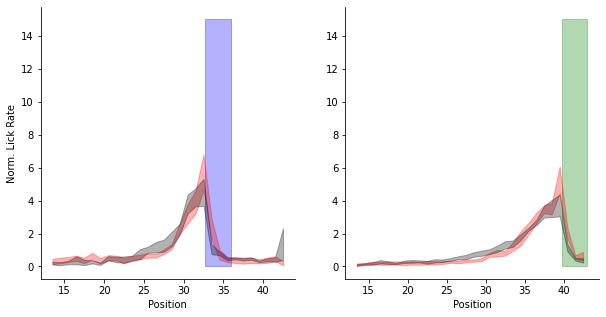

In [3]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


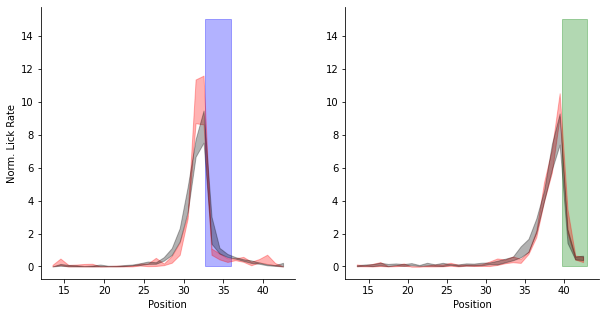

In [4]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
        
#         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
        ko_mu[lr].append(mu)

        
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)
#     ax[ax_ind].plot(sess.trial_matrices['bin_centers'],arr.T)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
#         print(lick_mean)
        mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day6.pdf'))

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.11001807657812257
0.10904625799328695
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.1100692616471082
0.16736622393861975
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.06032445223871624
0.11761779819386359
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
0.5986160337525217
0.1284017130366221
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.04977265940030089
0.06784264128951935
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
0.09556160932095294
0.11449060078059704
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}
0.30208560688972996
0.5298903020411834
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': -1, 'ravel_ind': 0}
0.2815490926532458
0.28627437193222127
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel_arm': 1, 'ravel_ind': 1}
0.09538482551033799
0.13479597571404267
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 

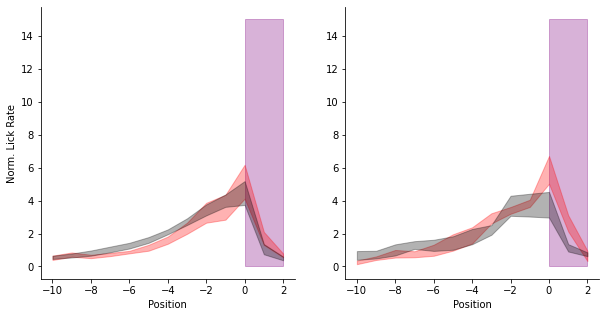

In [5]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.060054894931674326
0.07121593049563117
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.03676734009364598
0.04995217805680697
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.03981694341904314
0.03767281701217867
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
0.03586871894724765
0.04141683373820595
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
0.021589055587124907
0.020803115907144464
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.09974398653281691
0.09627240513598094
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
0.1287735153906072
0.23219426191059286
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.08552969765940971
0.0731144394651672
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
0.052712330169800266
0.08081991518278762
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.12403511881251388
0.12518638097135698


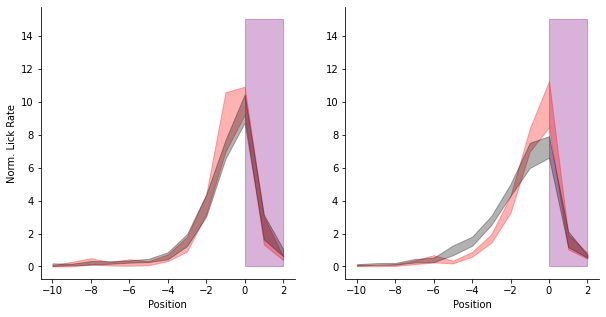

In [6]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day6.pdf'))

In [7]:
# reversal lick rates
def reversal_lickmat(mice, date_inds = [6,7,8]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_sessions(mouse, date_inds = [6,7,])
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==6)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = ((concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==6) + (concat_sess.trial_info['sess_num']==7) + \
              (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2))>0

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['licks'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['licks'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [8]:
sess= u.load_single_day(ko_mice[0],0)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


In [9]:
ko_l_lickmat, ko_r_lickmat = reversal_lickmat(ko_mice)

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
51


In [10]:
ctrl_l_lickmat, ctrl_r_lickmat = reversal_lickmat(ctrl_mice)

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


-0.8748340033355506 0.40716054002505364
-3.711092142797915 0.005947006204900119
-4.003255090966801 0.003931872482079357
-2.90959712063188 0.01960120101156539
-2.7144663453147087 0.02647445124940933
-3.973253754823371 0.004100214319643783


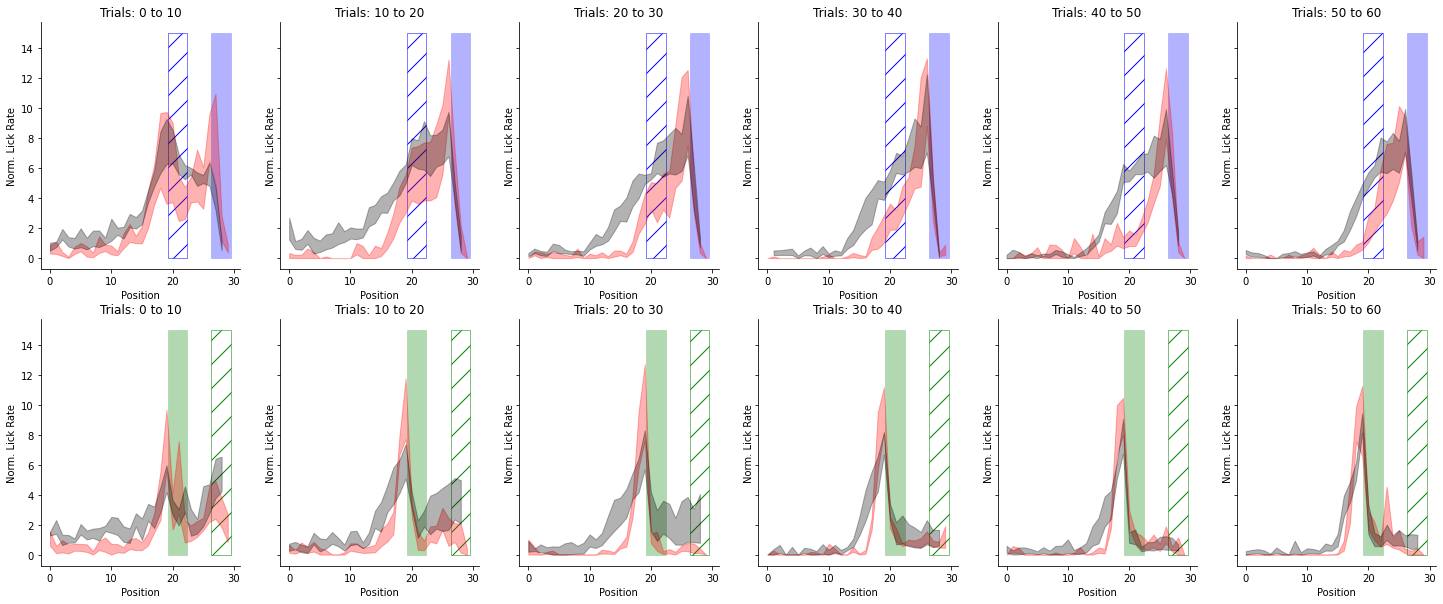

In [11]:
fig,ax = plt.subplots(2,6, figsize= [25,10], sharey=True)
for i,start in enumerate(range(0,60,10)):
    
    ax[0,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
fig.savefig(os.path.join(figdir, 'reversal_lickrate.pdf'))

In [12]:
def get_early_licks(sess):
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['tfront']-5)*(t_early_bins<=sess.rzone_early['tback']+1)
    baseline_mask = (sess.trial_info['sess_num']==6)*(sess.trial_info['LR']==-1)*(sess.trial_info['block_number']<2)
    ret_mask = (sess.trial_info['sess_num']==8)*(sess.trial_info['block_number']>1)
    rev_mask = (~baseline_mask)*(sess.trial_info['LR']==-1)*(~ret_mask)
    
    lr_early = sess.trial_matrices['licks'][:, rzone_early].mean(axis=1)
    lr_b = lr_early[baseline_mask].mean()
    lr_rev = lr_early[rev_mask]
    return lr_rev/lr_b
    

def get_early_lick_slope(sess):
    lr_rev = get_early_licks(sess)
    max_trial = np.minimum(lr_rev.shape[0],40)
    x = np.arange(max_trial)
    res = sp.stats.linregress(x,lr_rev[:max_trial])
    return res.slope



In [13]:
ko_lr_rev = [get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6,7, 8])) for mouse in ko_mice if mouse not in ['4467975.1']]
ctrl_lr_rev = [get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6,7, 8])) for mouse in ctrl_mice]

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s

06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal


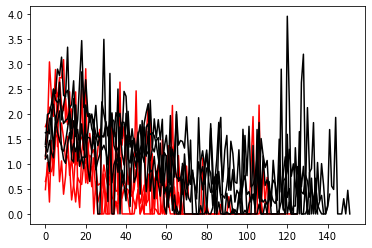

In [14]:
fig,ax = plt.subplots()
for i in range(4):
    ax.plot(ko_lr_rev[i], color = 'red')
for i in range(5):
    ax.plot(ctrl_lr_rev[i], color='black')

In [15]:
from statsmodels.regression.mixed_linear_model import MixedLM
import pandas as pd

In [16]:
df = pd.DataFrame({'ko': [],
                   'trial': [],
                   'trial_frac': [],
                   'mouse': [],
                   'lr': [],
                   'intercept': [],
                   'ko_x_trial': [],
                   'ko_x_trial_frac': [],
                  })

for mouse in ko_mice[1:]:
    lr = get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 1,
                        'ko_x_trial': i,
                        'ko_x_trial_frac': trial_frac,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)
        
for mouse in ctrl_mice:
    lr = get_early_licks(u.single_mouse_concat_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 0,
                        'ko_x_trial': 0,
                        'ko_x_trial_frac': 0,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)

    
    


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardRever

In [17]:

df['trial_norm'] = df['trial']/np.amax(df['trial'])
df['ko_x_trial_norm'] = df['ko']*df['trial_norm']

In [18]:
lmm_res = MixedLM(df['lr'], df[['ko', 'trial_frac', 'ko_x_trial_frac', 'intercept']], df['mouse'], exog_re= df['trial_frac'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  lr       
No. Observations:  389      Method:              REML     
No. Groups:        9        Scale:               0.3712   
Min. group size:   20       Log-Likelihood:      -367.3891
Max. group size:   57       Converged:           Yes      
Mean group size:   43.2                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
ko              -0.073    0.128 -0.569 0.570 -0.324  0.178
trial_frac      -0.609    0.165 -3.692 0.000 -0.932 -0.286
ko_x_trial_frac -0.636    0.270 -2.356 0.018 -1.166 -0.107
intercept        1.880    0.075 25.140 0.000  1.733  2.026
trial_frac Var   0.053    0.070                           

ko                  5.696149e-01
trial_frac          2.228496e-04
ko_x_trial_frac     1.849694e-02
intercept          1.82470

In [19]:
_df = df[df['trial']<40]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial', 'ko_x_trial', 'intercept']], _df['mouse'], exog_re = _df['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.params)
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: lr       
No. Observations: 324     Method:             REML     
No. Groups:       9       Scale:              0.3872   
Min. group size:  20      Log-Likelihood:     -320.9525
Max. group size:  40      Converged:          Yes      
Mean group size:  36.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
ko           -0.118    0.137 -0.862 0.389 -0.386  0.150
trial        -0.014    0.005 -2.874 0.004 -0.024 -0.005
ko_x_trial   -0.025    0.009 -2.797 0.005 -0.042 -0.007
intercept     1.920    0.086 22.232 0.000  1.751  2.090
trial Var     0.000    0.000                           

ko           -0.117898
trial        -0.014335
ko_x_trial   -0.024712
intercept     1.920424
trial Var     0.000134
dtype: float64
ko            0.136829
trial         0

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


152


<ipython-input-20-7530c14972e6>:42: RuntimeWarning: Mean of empty slice
  mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')


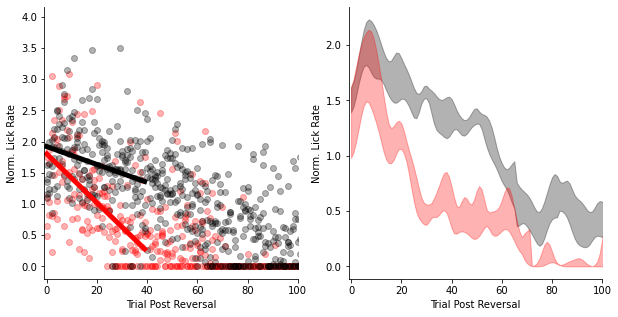

In [20]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

max_x = 0

for lr in ko_lr_rev:    
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='red', alpha=.3)
    
for lr in ctrl_lr_rev:
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='black',alpha=.3)

print(max_x)
ko_lr_arr = np.zeros([len(ko_lr_rev), max_x])*np.nan
ctrl_lr_arr = np.zeros([len(ctrl_lr_rev), max_x])*np.nan
for i, lr in enumerate(ko_lr_rev):
    n = lr.shape[0]
    ko_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
for i, lr in enumerate(ctrl_lr_rev):
    n = lr.shape[0]
    ctrl_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[0].plot(trials, y, color = 'black',linewidth=5)
trials = np.arange(0,40)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[0].plot(trials,y, color='red',linewidth=5)





    
x = np.arange(0, max_x)
mu,sem = np.nanmean(ctrl_lr_arr,axis=0), sp.stats.sem(ctrl_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='black', alpha= .3)

mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='red', alpha= .3)

for r in range(2):
    ax[r].set_xlim([-1,100])
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)
    ax[r].set_xlabel('Trial Post Reversal')
    ax[r].set_ylabel('Norm. Lick Rate')
    
fig.savefig(os.path.join(figdir, 'reversal_early_lr.pdf'))

In [45]:
_df = df[df['trial']<40]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial_norm', 'ko_x_trial_norm', 'intercept']], _df['mouse'], exog_re = _df['trial_norm'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  lr       
No. Observations:  324      Method:              REML     
No. Groups:        9        Scale:               0.3872   
Min. group size:   20       Log-Likelihood:      -312.9018
Max. group size:   40       Converged:           Yes      
Mean group size:   36.0                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
ko              -0.118    0.137 -0.862 0.389 -0.386  0.150
trial_norm      -0.803    0.279 -2.874 0.004 -1.350 -0.255
ko_x_trial_norm -1.384    0.495 -2.797 0.005 -2.354 -0.414
intercept        1.920    0.086 22.232 0.000  1.751  2.090
trial_norm Var   0.162    0.231                           

ko                  3.889110e-01
trial_norm          4.059415e-03
ko_x_trial_norm     5.159172e-03
intercept          1.67289

In [35]:
ko_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_sessions(mouse, date_inds=[6,7])) for mouse in ko_mice if mouse not in ['4467975.1']])
ctrl_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_sessions(mouse, date_inds=[6,7])) for mouse in ctrl_mice])

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversa

-1.5369951187372506 0.168177795466352
-1.4696938456699067 0.1416446902951368


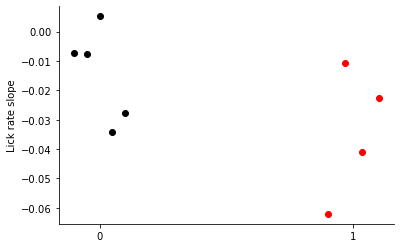

In [36]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(-.1,.1,num=4)+1, ko_slopes, color='red')
ax.scatter(np.linspace(-.1,.1,num=5), ctrl_slopes, color='black')
t,p = sp.stats.ttest_ind(ko_slopes, ctrl_slopes)
print(t,p)
t,p = sp.stats.ranksums(ko_slopes, ctrl_slopes)
print(t,p)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Lick rate slope')
ax.set_xticks([0,1])

fig.savefig(os.path.join(figdir, 'reversal_early_rz_slope.pdf'))
np.save("lick_slopes.npy", {'ko_slopes': ko_slopes, 'ctrl_slopes': ctrl_slopes})

In [22]:
# reversal lick rates
def return_lickmat(mice, date_inds = [8]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_sessions(mouse, date_inds = date_inds)
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==8)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = (concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==8)

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['licks'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['licks'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [24]:
ko_l_lickmat, ko_r_lickmat = return_lickmat(ko_mice[1:])
ctrl_l_lickmat, ctrl_r_lickmat = return_lickmat(ctrl_mice)

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
32
38


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
22
18
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
53
46
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
20
25
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
46
54
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
52
48
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
50
48
07_12_2020 YMaze_RewardR

-0.7564118870914543 0.47408505643251087
-0.10320777171440261 0.9206926481087123


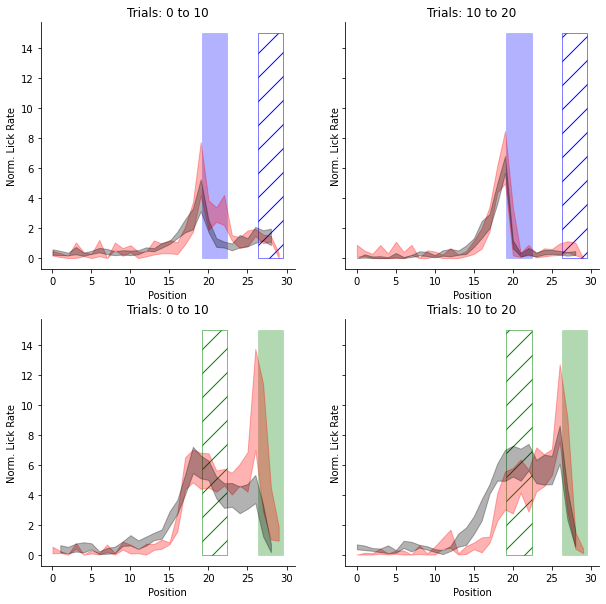

In [29]:
fig,ax = plt.subplots(2,2, figsize= [10,10], sharey=True)
for i,start in enumerate(range(0,20,10)):
    
    ax[0,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
fig.savefig(os.path.join(figdir, 'reversal_return_lickrate.pdf'))

{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:403: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  v = v[np.newaxis, :]


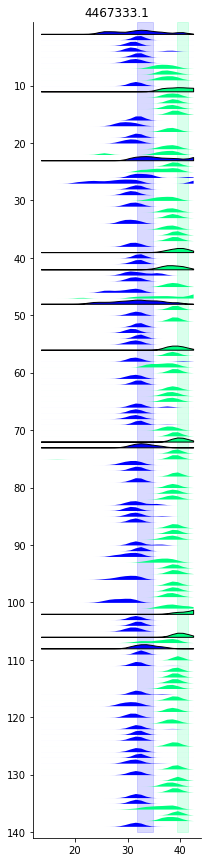

In [56]:
sess = u.load_single_day(ctrl_mice[4],5)

sess.add_timeseries(rewards=sess.vr_data['reward'])
sess.add_pos_binned_trial_matrix('rewards')

omis = ~(np.nansum(sess.trial_matrices['rewards'],axis=-1)>0)

fig, ax = plt.subplots(figsize=[3,15])
x = sess.trial_matrices['bin_centers']
cm = plt.cm.get_cmap('winter')
lr = sess.trial_info['LR']
mat = sess.trial_matrices['licks']
mat[np.isnan(mat)] = 0
mat = sp.ndimage.filters.gaussian_filter1d(mat,1,axis=1)
mat/=np.amax(mat,axis=1,keepdims=True)*1.4
# mat = filters.gaussian_filter1d(sess.trial_matrices['licks'], sig, axis=1)

for ind, i in enumerate(np.arange(mat.shape[0] - 1, 0, -1)):
    if omis[ind]:
        ax.fill_between(x, mat[ind, :] + i, y2=i, color=cm(np.float(lr[ind])), edgecolor='black')
    else:
        ax.fill_between(x, mat[ind, :] + i, y2=i, color=cm(np.float(lr[ind])), linewidth=.001)
        

ax.fill_betweenx([0,lr.shape[0]+1],31.9,34.8,color=plt.cm.winter(0.),alpha=.15,zorder=0)
ax.fill_betweenx([0,lr.shape[0]+1],39.5,41.6,color=plt.cm.winter(1.),alpha=.15,zorder=0)

ax.set_yticks(np.arange(0, mat.shape[0], 10))
ax.set_yticklabels(["%d" % i for i in np.arange(mat.shape[0], 0, -10).tolist()])
ax.set_ylim([-1,lr.shape[0]+1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title(sess.mouse)

fig.savefig(os.path.join(figdir,"single_sess_licks","Licks_%s_%s.pdf" % (sess.mouse,sess.date)))